In [ ]:
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import sklearn.feature_extraction.text as ft
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, Ridge
from sklearn.metrics import *
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("train.csv")


In [ ]:
df_samp = df.sample(159571)
df_samp

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
137572,e02a4930d9b634e2,"Charles, I took the metaphorical red-pencil to...",0,0,0,0,0,0
138180,e374a9d94eb15346,Draganparis case \n\nYou may remember I protes...,0,0,0,0,0,0
77413,cf65d76aeb220b8e,"If anything, Catholicism: . But she appears to...",0,0,0,0,0,0
63102,a8d632673ad4dc4f,"""\nThe bot seems to have had difficult logging...",0,0,0,0,0,0
71076,be3a6e32a31dc910,"A Message to You Allie\nOh HAI, cockmonkey n!g...",1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
151806,830235d942e18bb0,I assume you are aware that .,0,0,0,0,0,0
127421,a98188898ce247d8,"Oh, thanks for the tip, really. Does this one ...",0,0,0,0,0,0
71086,be41f49826b0e783,", please see Wikipedia:Civility. Don't call s...",0,0,0,0,0,0
24295,40225e15dff4dc4d,"I am not over arsed, I just don't think his mi...",0,0,0,0,0,0


In [ ]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df_samp[categories].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

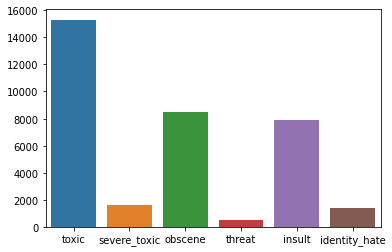

In [ ]:
sns.barplot(x=categories,y=df_samp[categories].sum())
plt.show()

In [ ]:
wc = WordCloud(background_color='white',
               max_words=100,
               stopwords=stopwords)

In [ ]:
def get_words(df,label):
    words = []
    for row in df[df[label]==1].iloc[:]['comment_text']:
        words += clean_text(row)
    return ' '.join(words)

In [ ]:
def clean_text(row):
    words = []
    for w in row.split():
        word = re.sub('[^A-Za-z0-9]+', '', str(w))
        words.append(word.lower())
    return words

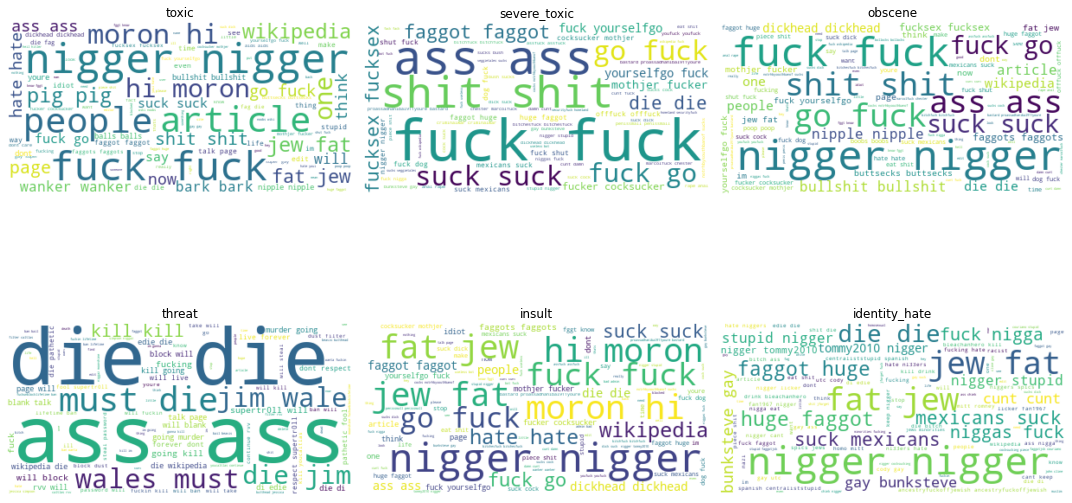

In [ ]:

fig = plt.figure(figsize=(15,10))

for i,l in enumerate(categories):
    wc.generate(get_words(df_samp,l))
    fig.add_subplot(2,3,i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(l)
    plt.axis('off')

fig.tight_layout()
plt.show()


In [ ]:
X = df_samp['comment_text']
y = df_samp[categories]
vectorizer = ft.TfidfVectorizer(stop_words=stop_words)
x_train,x_test,y_train,y_test = train_test_split(vectorizer.fit_transform(X),y,test_size=0.2,random_state=42)

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#params = {'n_neighbors':[8]}
KNN = KNeighborsClassifier(n_neighbors=8)
#KNN = GridSearchCV(KNN,params)

In [ ]:
#KNN_CV.best_estimator_
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
#params = {'n_estimators':[100]}
RFC = RandomForestClassifier()
#RFC_CV = GridSearchCV(RFC,params)

In [ ]:
#RFC_CV.best_estimator_
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:


model_names = ['DT','KNN','RFC']
models = [DT,KNN,RFC]
scores = []

for name,model in zip(model_names,models):
    scores.append(model.score(x_test,y_test))
  

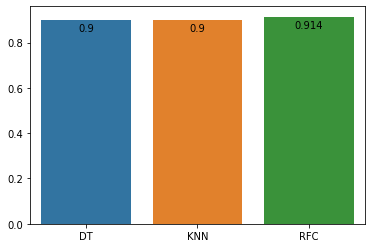

In [ ]:
g = sns.barplot(x=model_names,y=scores)
for idx,score in enumerate(scores):#zip(model_names,scores):
    plt.text(idx,score-0.05,round(score,3),ha='center')
plt.show()

In [ ]:
best_model = models[scores.index(max(scores))]

In [ ]:
x_train

<127656x189610 sparse matrix of type '<class 'numpy.float64'>'
	with 3592737 stored elements in Compressed Sparse Row format>

In [ ]:
arr = np.array(y_test)
y_test_=[]
for row in arr[0:6]:
   y_test_.append(np.array(row))

In [ ]:
y_test_

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0])]

In [ ]:
y_pred

[array([[0.75 , 0.25 ],
        [0.875, 0.125],
        [0.875, 0.125],
        ...,
        [0.75 , 0.25 ],
        [0.75 , 0.25 ],
        [0.75 , 0.25 ]]), array([[0.875, 0.125],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [1.   , 0.   ],
        [1.   , 0.   ],
        [0.875, 0.125]]), array([[0.875, 0.125],
        [0.875, 0.125],
        [0.875, 0.125],
        ...,
        [0.75 , 0.25 ],
        [0.75 , 0.25 ],
        [0.875, 0.125]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1.   , 0.   ],
        [0.875, 0.125],
        [1.   , 0.   ],
        ...,
        [0.875, 0.125],
        [0.875, 0.125],
        [1.   , 0.   ]]), array([[0.875, 0.125],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [0.875, 0.125],
        [1.   , 0.   ],
        [0.875, 0.125]])]

In [ ]:
from sklearn.metrics import confusion_matrix

model_names = ['DT','KNN','RFC']
models = [DT,KNN,RFC]
scores = []


y_pred = DT.predict_proba(x_test)
    # confusion_matrix(y_test, y_pred, labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['toxic','severe_toxic','obscene','threat','insult','identity_hate'], 
                     columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
    #Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

model_names = ['DT','KNN','RFC']
models = [DT,KNN,RFC]
scores = []


y_pred = RFC.predict_proba(x_test)
    # confusion_matrix(y_test, y_pred, labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['toxic','severe_toxic','obscene','threat','insult','identity_hate'], 
                     columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
    #Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

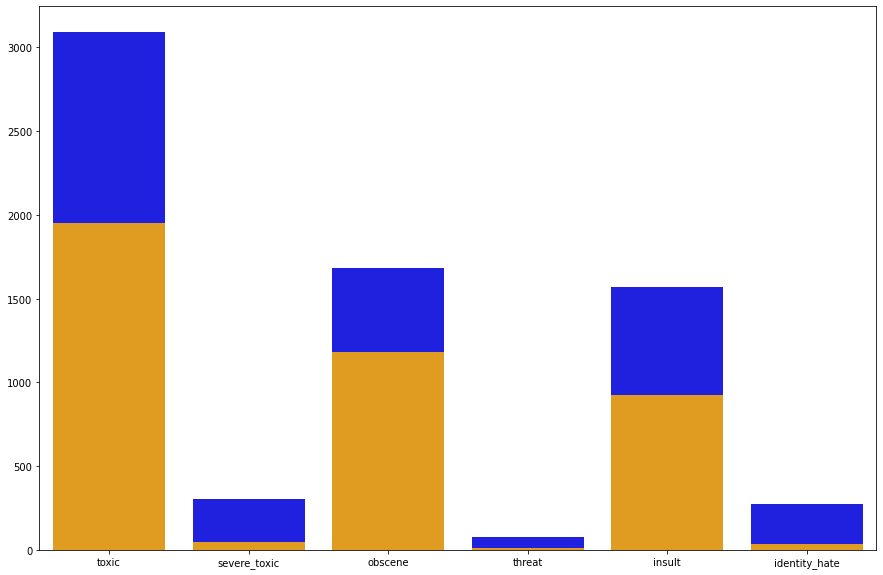

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=categories,y=y_test[categories].sum(),color='blue')
sns.barplot(x=categories,y=sum(best_model.predict(x_test)),color='orange')
plt.show()

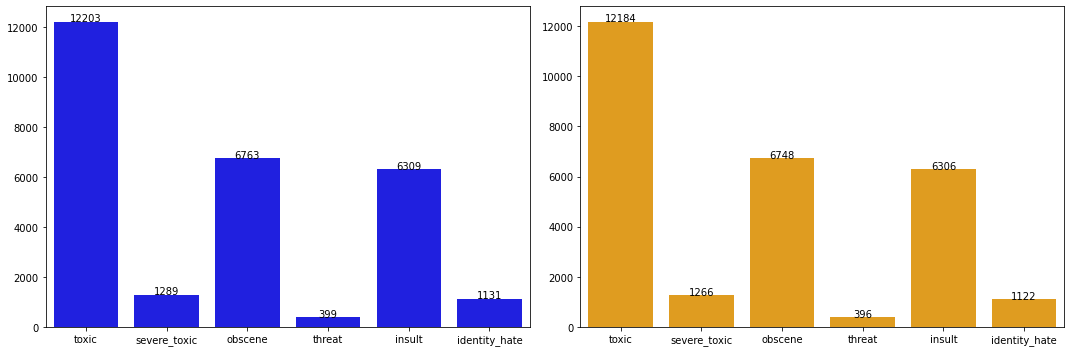

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
g = sns.barplot(x=categories,y=y_train[categories].sum(),color='blue')
for idx,score in enumerate(y_train[categories].sum()):#zip(model_names,scores):
    g.text(idx,score,round(score,5),ha='center')

fig.add_subplot(1,2,2)
g = sns.barplot(x=categories,y=sum(best_model.predict(x_train)),color='orange')
for idx,score in enumerate(sum(best_model.predict(x_train))):#zip(model_names,scores):
    g.text(idx,score,round(score,5),ha='center')

fig.tight_layout()
plt.show()

In [ ]:
X = vectorizer.fit_transform(df['comment_text'])
y = df[categories]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
best_model.fit(x_train,y_train)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
X = vectorizer.transform(df_test['comment_text'])
y = best_model.predict_proba(X)

In [ ]:
df

In [ ]:
df.to_csv('training.csv', encoding='utf-8')